#**1.Introduction**

The aim is to model is to predict the median_house_value, target variable
Overcome missing data with a basic unsupervised learning data imputation
Identification of outliers in a dataset
Understand how to turn a simple model into your learn-comparable class

#**2. Method**



#The analysis follows the steps as below.

#**3.EDA**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DS_Prod/December /California Housing Prices/housing.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [45]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [46]:
corr = df.corr()
corr.shape

(9, 9)

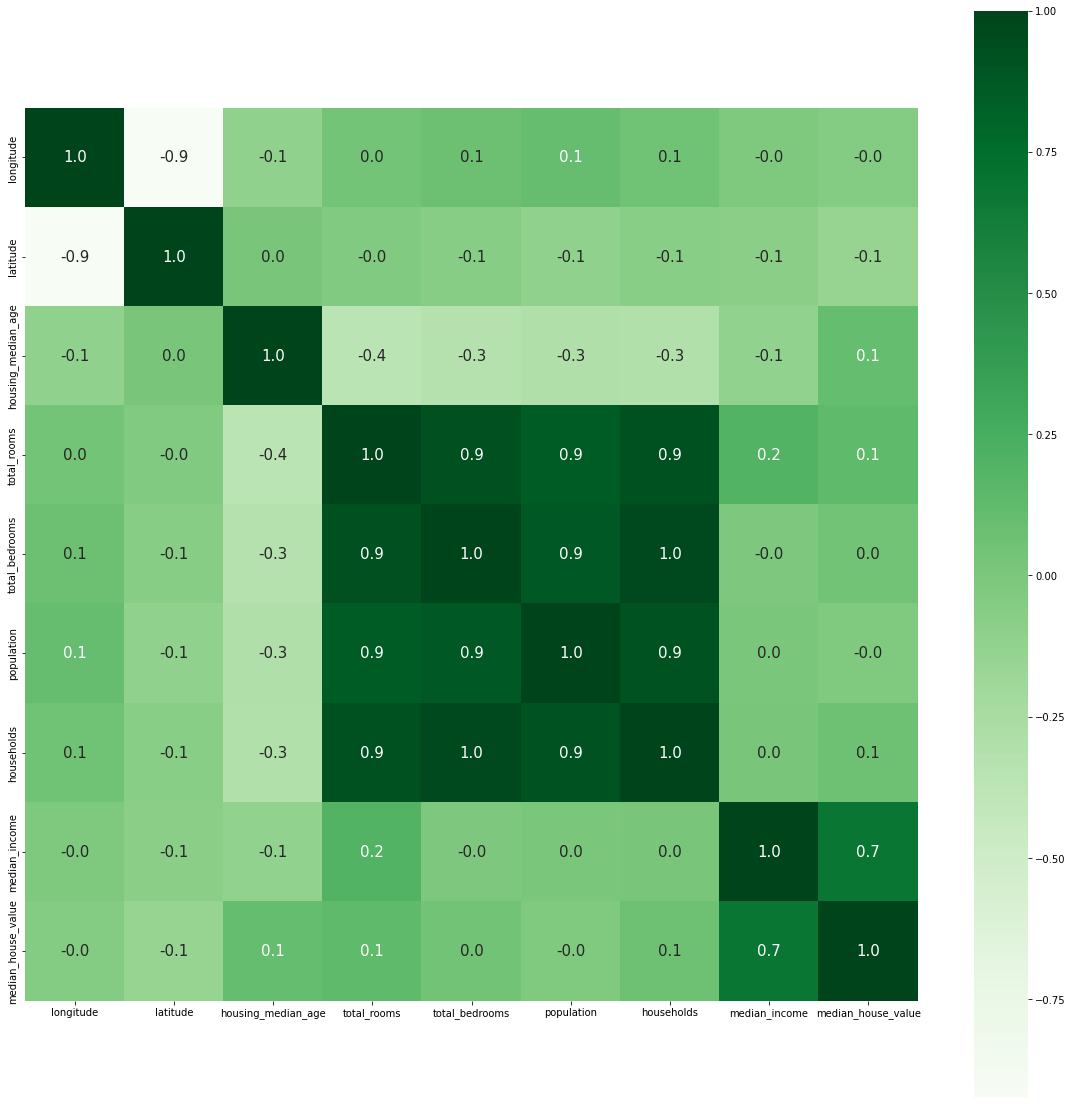

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [48]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [49]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


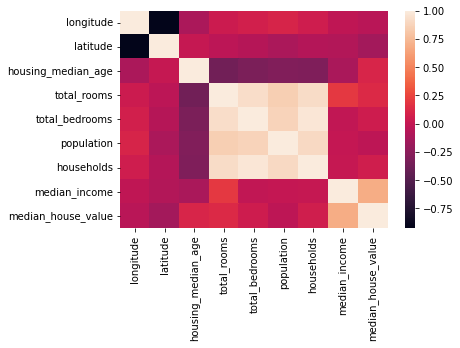

In [50]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

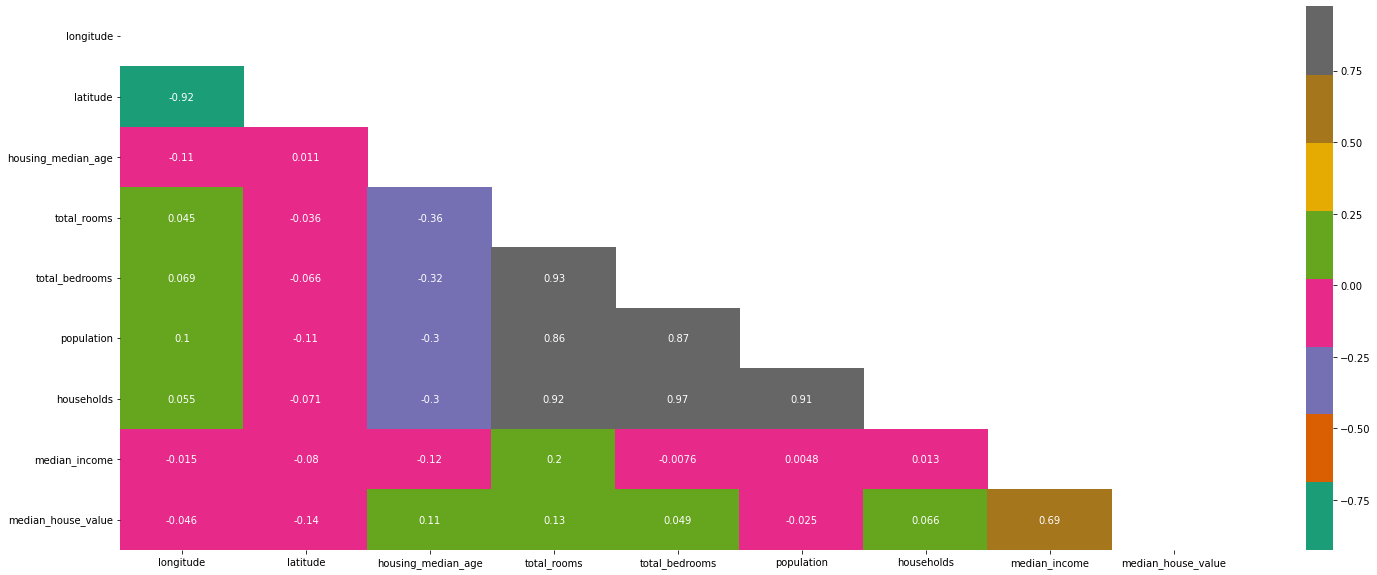

In [51]:
plt.figure(figsize=(25, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

#**4. Analyze**

In [52]:
x=df[['median_income']]
y=df.median_house_value.values.reshape(-1,1)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#4. First model Prediction Algorithms:


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [56]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

In [57]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [58]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [60]:
df = df.astype('float64')
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity       float64
dtype: object


##*1. Lasso Regression*


In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

lasso = Lasso()
lasso.fit(xtrain, ytrain)
lasso_train_score = lasso.score(xtrain, ytrain)
lasso_test_score = lasso.score(xtest, ytest)
lasso_r2_score = r2_score(ytest, lasso.predict(xtest))
lasso_mae = mean_absolute_error(ytest, lasso.predict(xtest))
lasso_mse = mean_squared_error(ytest, lasso.predict(xtest))

##*2.  Linear Regression*


In [62]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_train_score = lr.score(xtrain, ytrain)
lr_test_score = lr.score(xtest, ytest)
lr_r2_score = r2_score(ytest, lr.predict(xtest))
lr_mae = mean_absolute_error(ytest, lr.predict(xtest))
lr_mse = mean_squared_error(ytest, lr.predict(xtest))


##*3. Ridge regression*

---



In [63]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)
ridge_train_score = ridge.score(xtrain, ytrain)
ridge_test_score = ridge.score(xtest, ytest)
ridge_r2_score = r2_score(ytest, ridge.predict(xtest))
ridge_mae = mean_absolute_error(ytest, ridge.predict(xtest))
ridge_mse = mean_squared_error(ytest, ridge.predict(xtest))

##*4. Ada Boost regressor*

---



In [64]:
abr = AdaBoostRegressor()
abr.fit(xtrain, ytrain)
abr_train_score = abr.score(xtrain, ytrain)
abr_test_score = abr.score(xtest, ytest)
abr_r2_score = r2_score(ytest, abr.predict(xtest))
abr_mae = mean_absolute_error(ytest, abr.predict(xtest))
abr_mse = mean_squared_error(ytest, abr.predict(xtest))

##*5. Gradient Boosting Regressor*

---



In [65]:
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gbr_train_score = gbr.score(xtrain, ytrain)
gbr_test_score = gbr.score(xtest, ytest)
gbr_r2_score = r2_score(ytest, gbr.predict(xtest))
gbr_mae = mean_absolute_error(ytest, gbr.predict(xtest))
gbr_mse = mean_squared_error(ytest, gbr.predict(xtest))

##*6.Random Forest Regressor*

---



In [66]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
rfr_train_score = rfr.score(xtrain, ytrain)
rfr_test_score = rfr.score(xtest, ytest)
rfr_r2_score = r2_score(ytest, rfr.predict(xtest))
rfr_mae = mean_absolute_error(ytest, rfr.predict(xtest))
rfr_mse = mean_squared_error(ytest, rfr.predict(xtest))

##*7. Decision Tree Regressor*

---



In [67]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr_train_score = dtr.score(xtrain, ytrain)
dtr_test_score = dtr.score(xtest, ytest)
dtr_r2_score = r2_score(ytest, dtr.predict(xtest))
dtr_mae = mean_absolute_error(ytest, dtr.predict(xtest))
dtr_mse = mean_squared_error(ytest, dtr.predict(xtest))

##*8. XG Boost Regressor*

---



In [68]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_train_score = xgb.score(xtrain, ytrain)
xgb_test_score = xgb.score(xtest, ytest)
xgb_r2_score = r2_score(ytest, xgb.predict(xtest))
xgb_mae = mean_absolute_error(ytest, xgb.predict(xtest))
xgb_mse = mean_squared_error(ytest, xgb.predict(xtest))

[13:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


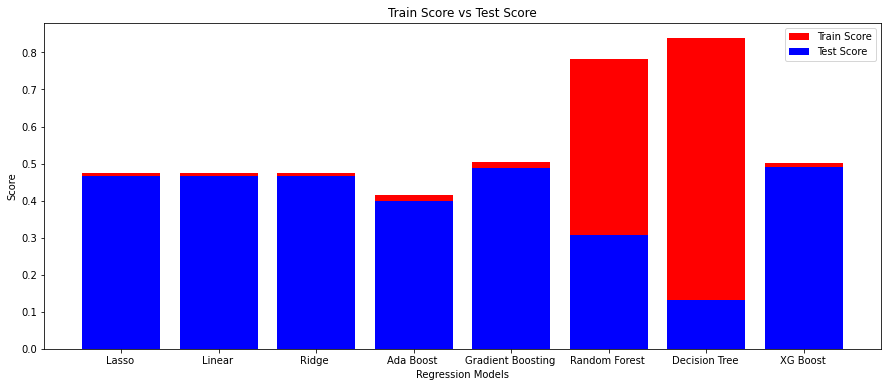

In [69]:
plt.figure(figsize=(15, 6))
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score], color="red", label="Train Score")
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_test_score, lr_test_score, ridge_test_score, abr_test_score, gbr_test_score, rfr_test_score, dtr_test_score, xgb_test_score], color="blue", label="Test Score")
plt.legend()
plt.title("Train Score vs Test Score")
plt.xlabel("Regression Models")
plt.ylabel("Score")
plt.show()

In [70]:
names = ['Lasso','LinReg','Reidge','ADABoost','GradientBoost','RandomForest','DecisionTree','XGBoost']
score =[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score]

In [71]:
scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

In [72]:
scores

,Algorithm Name,Score
0,Lasso,0.475674
1,LinReg,0.475674
2,Reidge,0.475674
3,ADABoost,0.414037
4,GradientBoost,0.504226
5,RandomForest,0.782773
6,DecisionTree,0.838551
7,XGBoost,0.502650


In [73]:
models = pd.DataFrame({
    'Model': ['Lasso'	,'LinReg'	,'Reidge'	,'ADABoost'	,'GradientBoost'	,'RandomForest'	,'DecisionTree'	,'XGBoost'],
    'R-squared Score': [lasso_r2_score*100,ridge_r2_score*100,abr_r2_score*100,gbr_r2_score*100,rfr_r2_score*100,dtr_r2_score*100,xgb_r2_score*100,lr_r2_score*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
6,DecisionTree,48.975893
3,ADABoost,48.929300
1,LinReg,46.762208
0,Lasso,46.762161
7,XGBoost,46.762137
2,Reidge,39.939029
4,GradientBoost,30.772179
5,RandomForest,13.233357


#**5.Conclusion**

We looked at an unsupervised learning approach to data imputation.
The data analysis revealed that our data could potentially cause issues for our model, such as nonlinearity,skewness,large variation in range,too highly correlated features to name a few.
We considered the base feature model, which wasn't very suitable, and went on to try various things to improve the model:
added extra features
removed features that didn't teach the model anything new
added PolynomialFeatures() which helped the model adapt to the nonlinear nature of the data
added scaling of features, which adjusted all features to a similar range
We obtained a model that performed significantly better than what we started with, so it was nice to make some progress
Additional things that could have been attempted are skewness correction & more thorough feature-by-feature basis influence analysis
